In [1]:
from metrics import *
from architecture import create_naive_net
from dlc_practical_prologue import generate_pair_sets as load_data

In [2]:
# Load data

train_input, train_target, train_classes, test_input, test_target, test_classes = load_data(1000)

In [7]:
# Create the naive net

naive_net = create_naive_net()
naive_net

Sequential(
  (0): Conv2d(2, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): ReLU()
  (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=128, out_features=2, bias=True)
)

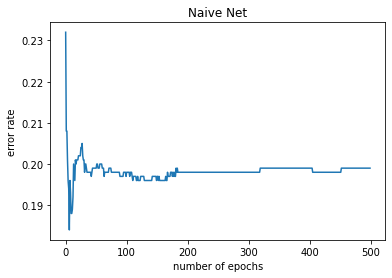

In [8]:
plot_error_vs_epochs(naive_net, 500, 1, train_input, train_target, test_input, test_target)